In [1299]:
import numpy as np
from matplotlib import pyplot as plt
import json, os

In [1447]:
run = 1
Gamma0  = 5000.00
rhoseed = 0.9 #0.9#0.16
rgamma  = 2.0
gammaxx = 1.0
gammayy = gammaxx*rgamma

alpha = 0.1
chi = 0

ddir = '/data' #'/new_drho_uniform_data'
model = '/model_Q_v_rho_h_CH_noise' # 

pdir = '../../'+ddir+model+'/gamma0_{:1.1f}_rhoseed_{:1.2f}/rgamma_{:1.2f}_alpha_{:1.2f}_chi_{:1.2f}/run_{:d}/'.format(Gamma0, rhoseed, rgamma, alpha, chi, run)

datadir = pdir+'data/'

with open(pdir+'parameters.json') as jsonFile:
    parameters = json.load(jsonFile)

T         = parameters["T"]        # final time
dt_dump   = parameters["dt_dump"]
n_steps   = int(parameters["n_steps"])  # number of time steps
n_dump = int(T/dt_dump); dn_dump = int(n_steps/n_dump)
K         = parameters["K"]        # elastic constant, sets diffusion lengthscale of S with Gamma0
d         = parameters["d"]; print(d)
lambd     = parameters["lambda"]
rho_in    = parameters["rho_in"]   # isotropic to nematic transition density, or "onset of order in the paper"
rhoisoend = parameters["rhoisoend"] /rho_in   # jamming density
rhonemend = parameters["rhonemend"] /rho_in   # jamming density max for nematic substrate
mx        = np.int32(parameters["mx"])
my        = np.int32(parameters["my"])
dx        = np.float32(parameters["dx"])
dy        = np.float32(parameters["dy"])
#setup a meshgrid
tol = 0.001

x   = np.linspace(0+tol, 1-tol, mx)
y   = np.linspace(0+tol, 1-tol, my)
xv, yv  = np.meshgrid(x,y, indexing='ij')


times = np.arange(0, n_dump, 1)*dt_dump

print(n_dump, lambd, T)

1
500 5 5


1.1407967328148962 0.07125857134396407
1.0701101691488963


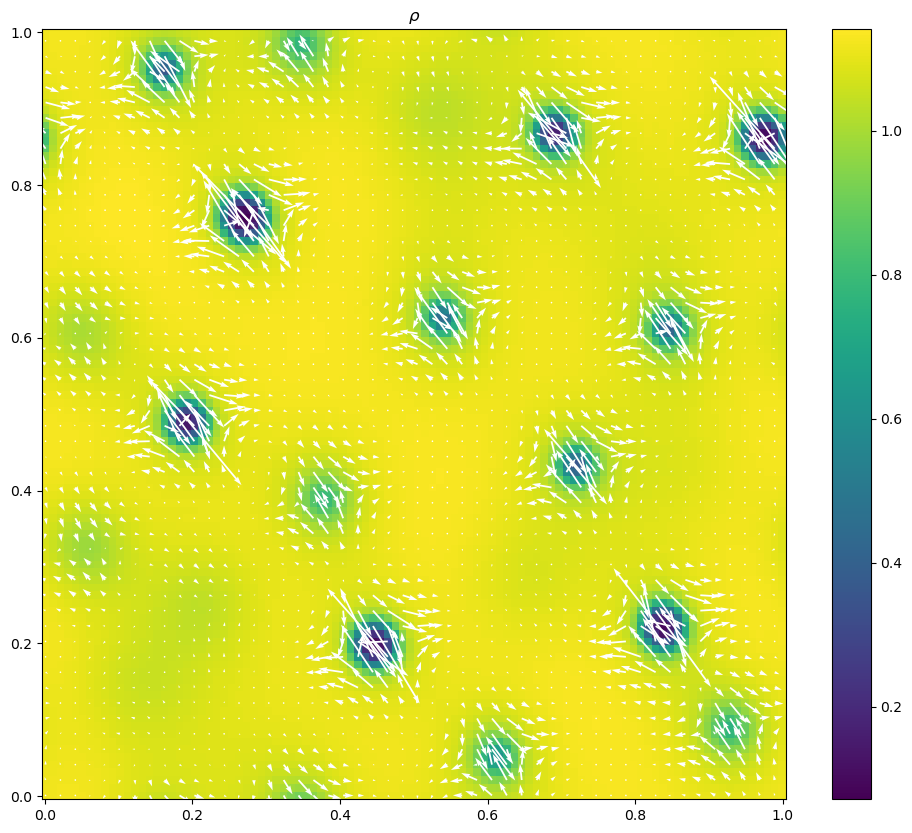

In [1448]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

fig, ax=plt.subplots(figsize=(12,10))
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)
n=427

field = np.loadtxt(datadir+'rho.csv.{:d}'.format(n), delimiter=',')
Qx = np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
Qy = np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')
S2 = Qx**2 + Qy**2
rhoend = rhoisoend + (rhonemend-rhoisoend)*S2
#field = rhoend - field
vx = np.loadtxt(datadir+'vx.csv.{:d}'.format(n), delimiter=',')
vy = np.loadtxt(datadir+'vy.csv.{:d}'.format(n), delimiter=',')
p_factor = 2

fmax = np.max(field); fmin=np.min(field); print(fmax, fmin)
print(np.average(field))
#ctrf = [ax.pcolormesh(xv, yv, S_sqrd[i], cmap=cmap1, vmin=0, vmax=Smax), ax.quiver(xv,yv,nx[i],ny[i], color='w')]
ctrf = [ax.pcolormesh(xv, yv, field, vmin=fmin, vmax=fmax), ax.quiver(xv[::p_factor, ::p_factor], yv[::p_factor, ::p_factor], vx[::p_factor, ::p_factor], vy[::p_factor, ::p_factor], color='w')]
plt.colorbar(ctrf[0])
plt.title(r"$\rho$")
plt.show()

0.34406225707018007 0.0009992809179957464 0.2652117234195482


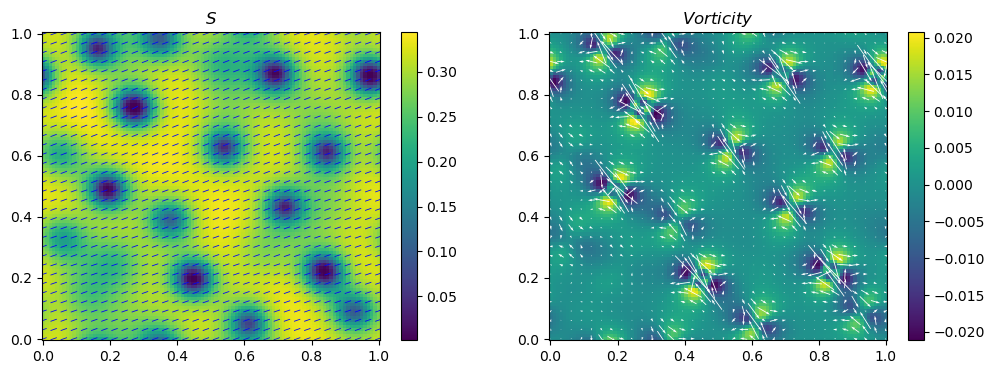

In [1449]:
fig, ax=plt.subplots(figsize=(12,4),ncols=2)
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

n=427

Qxx = np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
Qxy = np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')
curldivQ = np.loadtxt(datadir+'curldivQ.csv.{:d}'.format(n), delimiter=',')
S = np.sqrt(Qxx**2+Qxy**2)
vx = np.loadtxt(datadir+'vx.csv.{:d}'.format(n), delimiter=',')
vy = np.loadtxt(datadir+'vy.csv.{:d}'.format(n), delimiter=',')
p_factor = 3
theta = np.arctan2(Qxy, Qxx)/2
Snx    = np.cos(theta)
Sny    = np.sin(theta)
print(np.max(S), np.min(S), np.average(S))

plot1 = [ax[0].pcolormesh(xv, yv, S, cmap='viridis', vmin=np.min(S), vmax=np.max(S)), ax[0].quiver(xv[::p_factor, ::p_factor],yv[::p_factor, ::p_factor],Snx[::p_factor, ::p_factor],Sny[::p_factor, ::p_factor], color='b', pivot='middle', headlength=0, headaxislength=0, scale=50, scale_units='xy')]
plot2 = [ax[1].pcolormesh(xv, yv, curldivQ, cmap='viridis', vmin=np.min(curldivQ), vmax=np.max(curldivQ)), ax[1].quiver(xv[::p_factor, ::p_factor],yv[::p_factor, ::p_factor],vx[::p_factor, ::p_factor],vy[::p_factor, ::p_factor], color='w', pivot='middle')]

fig.colorbar(plot1[0], ax=ax[0])
fig.colorbar(plot2[0], ax=ax[1])
ax[0].set_title(r"$ S $")
ax[1].set_title(r"$ Vorticity $")
plt.show()

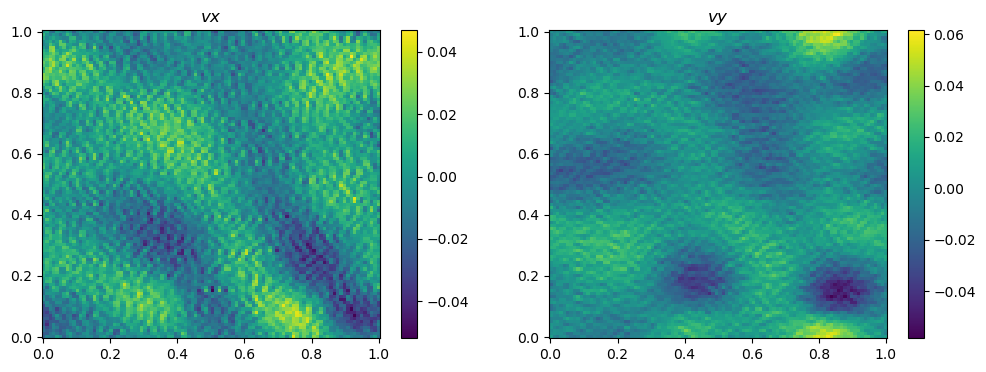

In [1437]:
n=346
vx = np.loadtxt(datadir+'vx.csv.{:d}'.format(n), delimiter=',')
vy = np.loadtxt(datadir+'vy.csv.{:d}'.format(n), delimiter=',')

fig, ax=plt.subplots(figsize=(12,4),ncols=2)
plot1 = [ax[0].pcolormesh(xv, yv, vx, cmap='viridis', vmin=np.min(vx), vmax=np.max(vx))]
plot2 = [ax[1].pcolormesh(xv, yv, vy, cmap='viridis', vmin=np.min(vy), vmax=np.max(vy))]

fig.colorbar(plot1[0], ax=ax[0])
fig.colorbar(plot2[0], ax=ax[1])
ax[0].set_title(r"$ vx $")
ax[1].set_title(r"$ vy $")
plt.show()

In [606]:
Rho = np.loadtxt(pdir+'/processed_data/meanrho.csv', delimiter=',')
Ssum= np.loadtxt(pdir+'/processed_data/meanS.csv', delimiter=',')
stdtheta = np.loadtxt(pdir+'/processed_data/stdtheta.csv', delimiter=',')
meantheta = np.loadtxt(pdir+'/processed_data/meantheta.csv', delimiter=',')
Rhoend = rhoisoend + (rhonemend-rhoisoend)*Ssum**2
Gamma_rho = Gamma0*np.heaviside(np.tanh(Rhoend - Rho),0)*np.tanh(Rhoend - Rho)
print(Gamma_rho[-1])
fig, ax = plt.subplots(figsize=(12,7), ncols=2, nrows=2)
ax[0,0].plot(times, Rho); ax[0,0].set_xlabel(r'$time/\tau_g$'); ax[0,0].set_ylabel(r'$\rho$(t)');
ax[0,1].plot(times, Ssum); ax[0,1].set_xlabel(r'$time/\tau_g$'); ax[0,1].set_ylabel(r'$S$(t)');
ax[0,1].set_ylim(0,1);
ax[1,0].scatter(Rho, Ssum); ax[1,0].set_xlabel(r'$\rho$'); ax[1,0].set_ylabel(r'$S$(t)');
ax[1,1].plot(times, stdtheta); ax[1,1].set_xlabel(r'$time/\tau_g$'); ax[1,1].set_ylabel(r'STD $\theta$(t)');

FileNotFoundError: ../..//data/model_Q_v_rho_h_CH_noise/gamma0_500.0_rhoseed_0.50/rgamma_2.00_alpha_0.10_chi_5.00/run_1//processed_data/meanrho.csv not found.

5.333394784061697e-07 0.2651442041476582
-0.09368417309983043


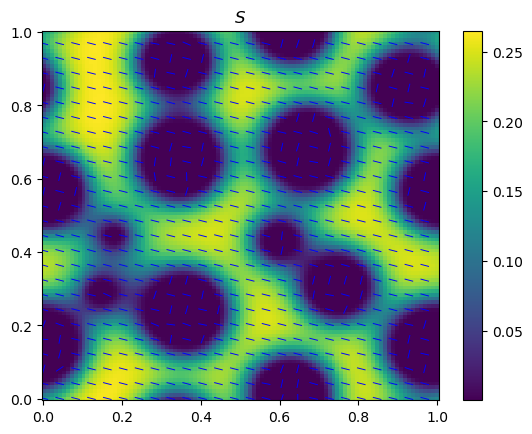

In [1307]:
fig, ax=plt.subplots()
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

n=300

curldivQ = np.loadtxt(datadir+'curldivQ.csv.{:d}'.format(n), delimiter=',')
Qxx = np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
Qxy = np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')
S = np.sqrt(Qxx**2+Qxy**2)
theta = np.arctan2(Qxy, Qxx)/2
nx    = np.cos(theta)
ny    = np.sin(theta)

print(np.min(S), np.max(S))

p_factor = 4
#print(p_half_defects, m_half_defects)

print(np.mean(theta))

ix, fx, iy, fy = 0, 100, 0, 100
ctrf = [ax.pcolormesh(xv[ix:fx, iy:fy], yv[ix:fx, iy:fy], (S)[ix:fx, iy:fy], cmap='viridis', vmin=np.min(S), vmax=np.max(S))]
ax.quiver(xv[ix:fx:p_factor, iy:fy:p_factor],yv[ix:fx:p_factor, iy:fy:p_factor], nx[ix:fx:p_factor, iy:fy:p_factor], ny[ix:fx:p_factor, iy:fy:p_factor], color='b', pivot='middle', headlength=0, headaxislength=0)
#ax.scatter(p_half_defects[1]/mx, p_half_defects[0]/my, color='pink')
#ax.scatter(m_half_defects[1]/mx, m_half_defects[0]/my, color='red')
#ctrf = [ax.pcolormesh(xv, yv, rho[i], cmap=cmap1, vmin=np.min(rho), vmax=np.max(rho)), ax.quiver(xv,yv,nx[i],ny[i], color='w', headlength=0, headaxislength=0, width=0.006, pivot='middle')]
#ctrf = [ax.pcolormesh(xv, yv, rho[i]*v[i,:,:,1])]
plt.colorbar(ctrf[0])
plt.title(r"$ S $")
plt.show()

In [13]:
def pixelate(x, gridpoints):
    nx, ny = np.shape(x)
    xpad = np.pad(x, (gridpoints, gridpoints), 'wrap')
    ret = np.zeros(np.shape(x))
    for cx in np.arange(nx):
        for cy in np.arange(ny):
            ret[cx, cy] += np.average(xpad[cx:cx+2*gridpoints, cy:cy+2*gridpoints])
    return ret

In [351]:
1j*1j

(-1+0j)